In [97]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import requests
import json

In [98]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34448,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34449,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34450,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34451,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data2 = data.loc[:,["location","date","new_cases"]]
data2

,location,date,new_cases
0,Afghanistan,2019-12-31,0.0
1,Afghanistan,2020-01-01,0.0
2,Afghanistan,2020-01-02,0.0
3,Afghanistan,2020-01-03,0.0
4,Afghanistan,2020-01-04,0.0
...,...,...,...
34448,International,2020-02-28,0.0
34449,International,2020-02-29,0.0
34450,International,2020-03-01,0.0
34451,International,2020-03-02,0.0


In [100]:
data2.set_index(["location"],inplace=True)


In [101]:
data2 = data2.loc[["Spain"],:].dropna()
data2

,date,new_cases
location,,
Spain,2019-12-31,0.0
Spain,2020-01-01,0.0
Spain,2020-01-02,0.0
Spain,2020-01-03,0.0
Spain,2020-01-04,0.0
...,...,...
Spain,2020-07-29,2031.0
Spain,2020-07-30,2789.0
Spain,2020-07-31,3092.0


In [102]:
data2.reset_index(inplace=True)
data2

,location,date,new_cases
0,Spain,2019-12-31,0.0
1,Spain,2020-01-01,0.0
2,Spain,2020-01-02,0.0
3,Spain,2020-01-03,0.0
4,Spain,2020-01-04,0.0
...,...,...,...
211,Spain,2020-07-29,2031.0
212,Spain,2020-07-30,2789.0
213,Spain,2020-07-31,3092.0
214,Spain,2020-08-01,0.0


In [103]:
data2

,location,date,new_cases
0,Spain,2019-12-31,0.0
1,Spain,2020-01-01,0.0
2,Spain,2020-01-02,0.0
3,Spain,2020-01-03,0.0
4,Spain,2020-01-04,0.0
...,...,...,...
211,Spain,2020-07-29,2031.0
212,Spain,2020-07-30,2789.0
213,Spain,2020-07-31,3092.0
214,Spain,2020-08-01,0.0


In [104]:
data2.set_index("date", inplace=True)

In [105]:
data2

,location,new_cases
date,,
2019-12-31,Spain,0.0
2020-01-01,Spain,0.0
2020-01-02,Spain,0.0
2020-01-03,Spain,0.0
2020-01-04,Spain,0.0
...,...,...
2020-07-29,Spain,2031.0
2020-07-30,Spain,2789.0
2020-07-31,Spain,3092.0


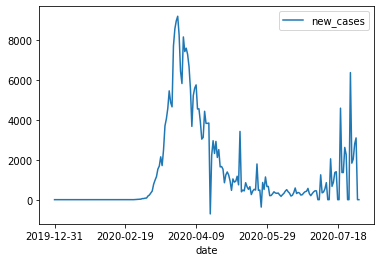

In [106]:
data2.plot()

Text(0.5, 1.0, 'Spain')

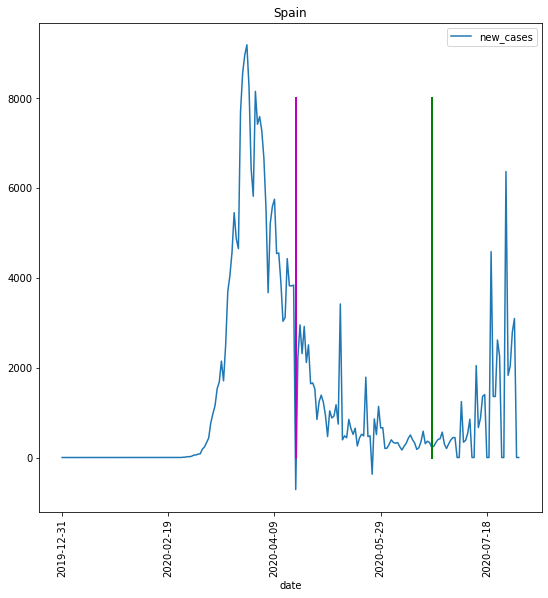

In [107]:
data2.plot(figsize=(9,9), rot=90)
plt.xlabel("date")
plt.plot([174,174],[0,8000],'k-', lw=2, color="g")
plt.plot([110,110],[0,8000],'k-', lw=2, color="m")
plt.title("Spain")
